This is a simulation done as practice for one previous semester. 

The instruction says that there's an ant who wants to reach to the opposite corner of where it is. 
It can not go further than the matrix dimension, and it starts at position 0,0. The task is to calculate the probabilities of this ant (his name is Billie) to reach to the opposite corner at n,n. Where n is the lenght of any of the sides of the matrix. 

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Simulemos a la hormiga Billie
# Inicia en la posición (0,0)
P0 = np.zeros(2)
# Billie está encerrado en una matriz de 6x6 y no se puede mover fuera de esta matriz.
def posibles(posicion_billie,x=6,y=6):
    posibilidades = []
    if posicion_billie[0] > 0:
        posibilidades.append(np.array([-1,0]))
    if posicion_billie[0] < x:
        posibilidades.append(np.array([1,0]))
    if posicion_billie[1] > 0:
        posibilidades.append(np.array([0,-1]))
    if posicion_billie[1] < y:
        posibilidades.append(np.array([0,1]))
    
    if len(posibilidades) > 1:
        return posibilidades
    return [posibilidades]

In [17]:
mov = posibles(P0)
mov

[array([1, 0]), array([0, 1])]

In [18]:
# Adicional a esto, sabemos que Billie no puede pisar donde haya pisado antes.
def movimiento(posibles, historial_pisadas, x=6, y=6):
    mov = posibles(historial_pisadas[-1], x, y)
    mov_results = historial_pisadas[-1] + mov
    tup_mr = [tuple(i) for i in mov_results]
    tup_hist = [tuple(i) for i in historial_pisadas]

    movs = [(np.array(x) - historial_pisadas[-1]) for x in tup_mr if x not in tup_hist]
    if len(movs) > 0:
        return random.choice(movs)    
    return [0,0]

In [19]:
# Si quisieramos ver los primeros n pasos de Billie:
#historial_pisadas = [P0]
#for _ in range(20):
#    mov = movimiento(posibles, historial_pisadas)
#    historial_pisadas.append(historial_pisadas[-1] + mov)
#historial_pisadas

In [33]:
def corrida_Billie(x = 6, y = 6):
    historial_pisadas = [P0]
    terminado = False
    while not terminado:
        mov = movimiento(posibles, historial_pisadas, x, y)
        historial_pisadas.append(historial_pisadas[-1] + mov)
        if (historial_pisadas[-1] == [x,y]).all():
            terminado = True
            return 1,historial_pisadas
        if len(historial_pisadas) > 1:
            if (historial_pisadas[-1] == historial_pisadas[-2]).all():
                terminado = True

                return -1, historial_pisadas

In [23]:
# Simulamos una 'corrida' de Billie hasta que se atasque o llege a la meta.           
corrida1 = corrida_Billie()
if corrida1[0] == 1:
    print('Billie llegó a la meta!!!')
else: 
    print('Billie no llegó a la meta :(')
historial_pisadas = corrida1[1]
historial_pisadas

Billie llegó a la meta!!!


[array([0., 0.]),
 array([1., 0.]),
 array([1., 1.]),
 array([0., 1.]),
 array([0., 2.]),
 array([1., 2.]),
 array([2., 2.]),
 array([3., 2.]),
 array([3., 3.]),
 array([2., 3.]),
 array([2., 4.]),
 array([3., 4.]),
 array([4., 4.]),
 array([5., 4.]),
 array([6., 4.]),
 array([6., 5.]),
 array([5., 5.]),
 array([5., 6.]),
 array([6., 6.])]

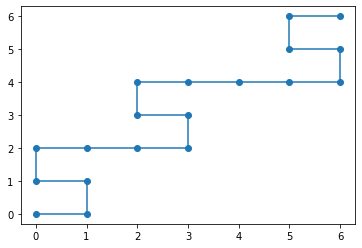

In [24]:
# Veamos cuál fue el recorrido de Billie: 
plt.plot(np.array(historial_pisadas)[:,0],np.array(historial_pisadas)[:,1], '-o')

In [26]:
# Esa fue una corrida de Billie, veamos que tal le va en el largo plazo...
n_corridas = 5000
corridas = np.zeros(n_corridas,)
for i in range(n_corridas):
    corridas[i] = corrida_Billie()[0]
corridas[::100]

array([ 1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [27]:
# En n_corridas, cuantas veces llegó a su meta(1)? y cuantas no(-1)?
pd.value_counts(corridas)

-1.0    3699
 1.0    1301
dtype: int64

In [28]:
# Entonces, la probabilidad de que Billie llegue a casa es de: 
corridas[corridas == 1].sum()/n_corridas

0.2602

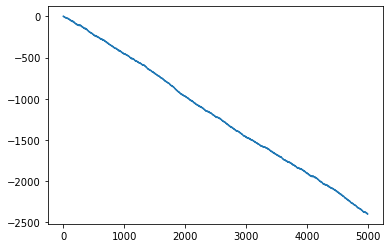

In [29]:
# Al parecer Billie es bastante consistente... Pobre Billie
plt.plot(corridas.cumsum())

In [120]:
# Ok ok, pero eso fue cuando billie esta en una matriz de 6X6, pero...
# Que pasa con las probabilidades cuando esta una de 2x2, 3x3, 4x4, ..., 10x10?

def Corridas(distancias, n_corridas):
    prob = np.zeros(len(distancias),)
    for d in range(len(distancias)):
        x, y = distancias[d], distancias[d]
        corridas = np.array([corrida_Billie(x, y)[0] for _ in range(n_corridas)])
        prob[d] = corridas[corridas == 1].sum()/n_corridas
    return prob
distancias = [2,3,5,7,11,13,19,23,29]
n_corridas = 5000
prob = Corridas(distancias, n_corridas)

In [123]:
prob

array([0.7736, 0.5698, 0.3326, 0.2   , 0.0778, 0.049 , 0.0156, 0.0068,
       0.0024])

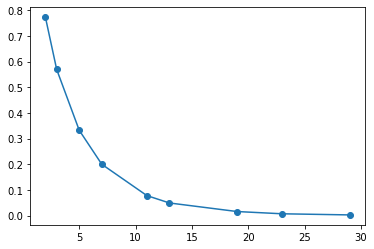

In [121]:
# Grafiquemos las probabilidades de que Billie llegue a su destino, con respecto a la longitud de la matriz (cuadrada).
plt.plot(distancias,prob, '-o')

In [138]:
# Por último, vemos un recorrido de Billie cuando está un una de 20x20 y logra llegar a la meta! 
corrida20 = corrida_Billie(20,20)

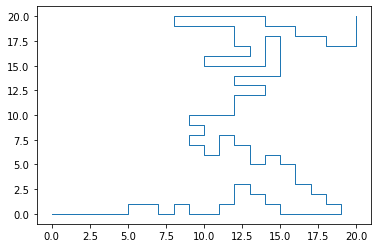

In [136]:
# Este suceso tiene una probabilidad de aproximadamente 1/64.
plt.plot(np.array(corrida20[1])[:,0],np.array(corrida20[1])[:,1], '-', linewidth=1)

### Moraleja: No mandes a Billie tan lejos, lo más probable es que no llegue :(